# Computer Vision Masterclass - Autoencoders for image compression

## Linear autoencoder

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

### Visualizing the images

In [ ]:
np.random.randint(0, 59999)

14586

5


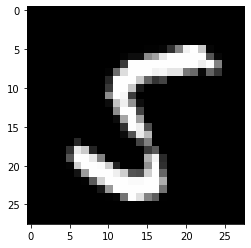

In [ ]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [ ]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

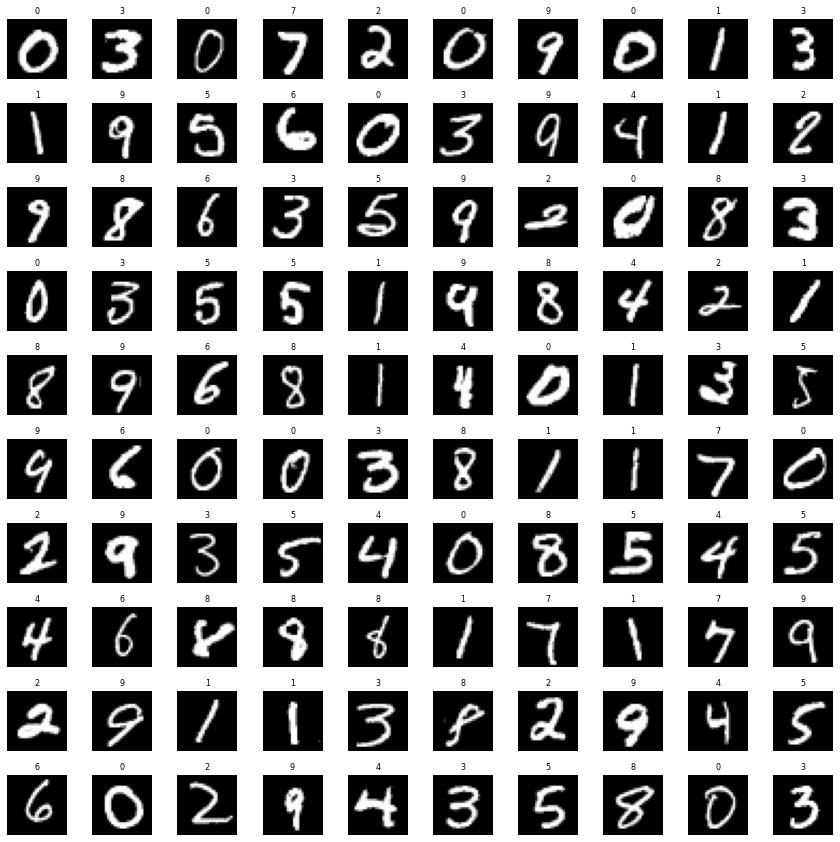

In [ ]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))
#print(axes.shape)
axes = axes.ravel() # -> (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, width * height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [ ]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [ ]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [ ]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 0.1973 - accuracy: 0.0091
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.0103
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1006 - accuracy: 0.0119
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0961 - accuracy: 0.0119
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0926 - accuracy: 0.0136
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.0136
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.0140
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.0130
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.0128
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.086

### Encoding the images

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [ ]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [ ]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


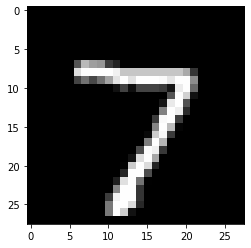

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [ ]:
X_test[0].shape

(784,)

In [ ]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [ ]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

In [ ]:
encoded_image, encoded_image.shape

(array([[4.778989  , 0.        , 0.        , 5.6449165 , 4.856689  ,
         3.3624308 , 4.112714  , 3.3822427 , 6.128308  , 3.3710158 ,
         2.6739335 , 2.3573833 , 1.3762919 , 0.        , 2.0619886 ,
         4.126144  , 0.97110337, 0.        , 0.03630947, 6.4651656 ,
         6.0685935 , 4.9704766 , 3.892329  , 3.369185  , 2.3937268 ,
         4.322928  , 2.5365763 , 0.        , 0.        , 2.2552505 ,
         7.2219977 , 0.6098089 ]], dtype=float32), (1, 32))

In [ ]:
8 * 4

32

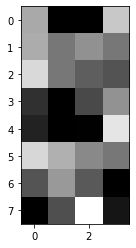

In [ ]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
__________________________________________________

In [ ]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoded_image = decoder.predict(encoded_image)

In [ ]:
decoded_image.shape

(1, 784)

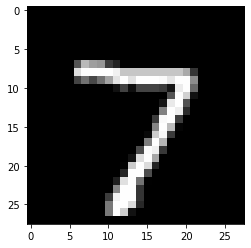

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

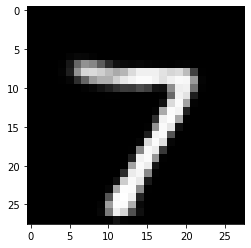

In [ ]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

### Encoding and decoding the test images

In [ ]:
X_test.shape[0] # 9999

10000

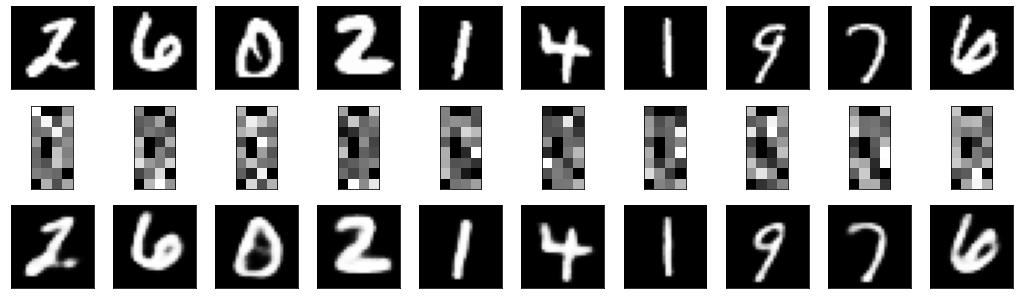

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

## Convolutional autoencoders

### Importing the libraries

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

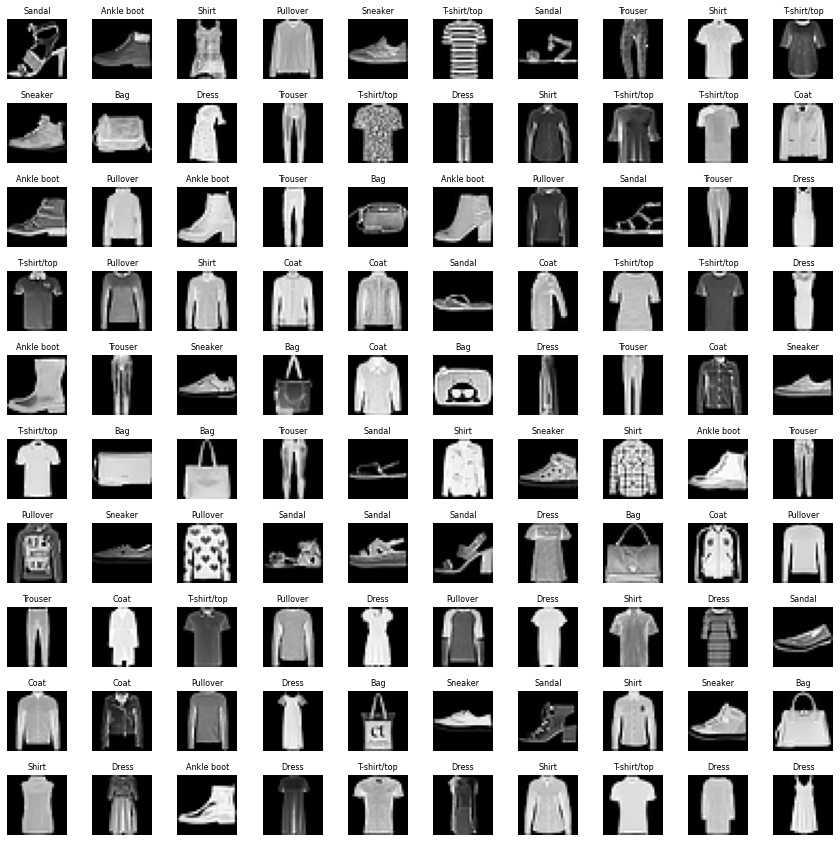

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [ ]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 4, 4, 8)         

In [ ]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [ ]:
(28 - 3 + 1) / 1, (16 - 3 + 1) / 1

(26.0, 14.0)

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 12s 3ms/step - loss: 0.3598 - accuracy: 0.4993
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.5041
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2862 - accuracy: 0.5064
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - accuracy: 0.5075
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2791 - accuracy: 0.5077
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2780 - accuracy: 0.5075
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2767 - accuracy: 0.5081
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2761 - accuracy: 0.5080
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2752 - accuracy: 0.5081
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.27

### Encoding and decoding the test images

In [ ]:
autoencoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 4, 4, 8)         

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_10').output)
encoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0   

In [ ]:
coded_test_images = encoder.predict(X_test)

In [ ]:
coded_test_images.shape

(10000, 128)

In [ ]:
coded_test_images[0]

array([4.03439134e-01, 4.31972563e-01, 1.38497859e-01, 1.77692175e-02,
       1.66454494e-01, 4.17897105e-01, 7.12615073e-01, 1.59945011e-01,
       7.84661412e-01, 6.75709188e-01, 2.42922813e-01, 2.35619307e-01,
       1.82469591e-01, 4.23118621e-01, 9.36554551e-01, 2.53009826e-01,
       9.76036966e-01, 8.78306925e-01, 1.22046828e-01, 1.69068068e-01,
       2.03729033e-01, 2.42331713e-01, 1.17612231e+00, 6.24346733e-01,
       5.10560215e-01, 9.21059608e-01, 2.77725399e-01, 3.19080889e-01,
       4.71799910e-01, 2.33430967e-01, 5.74509740e-01, 6.54074311e-01,
       4.96030211e-01, 7.32499897e-01, 3.14212412e-01, 2.03590870e-01,
       4.13268805e-04, 1.70519993e-01, 1.02100122e+00, 4.17073876e-01,
       7.96272039e-01, 1.32958531e+00, 0.00000000e+00, 0.00000000e+00,
       1.44604325e-01, 2.60494798e-01, 8.66552472e-01, 1.03822851e+00,
       6.45197213e-01, 1.69582367e+00, 0.00000000e+00, 0.00000000e+00,
       1.69852269e+00, 5.40485501e-01, 1.18128061e+00, 2.85632229e+00,
      

In [ ]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 28, 28, 1)

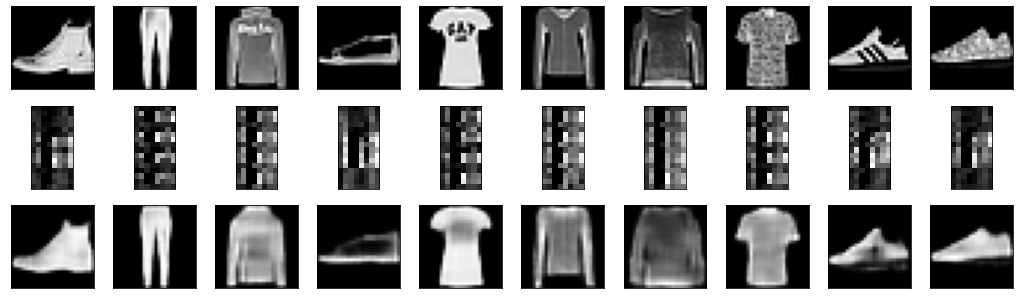

In [ ]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

In [ ]:
16 * 8

128